# 2D visualization of the feature vectors

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

I converted the feature vectors of all teams into two dimensions and observed if there were differences between the good and bad teams. I divided the teams into tiers according to the placements in the table at the end of the validation season. Then I observed if the teams from the same tier are close to each other in the 2D representation. I experimented with options such as whether to use TSNE or PCA for dimensionality reduction, whether to display home or away vectors, whether to make the tiers according to overall standings or according to only home/away standings and whether to use vectors extracted before or after apllying the threshold. The best results were achieved with TSNE, away vectors, overall standings and vectors before threshold.

In [ ]:
# Tiers according to the final tables of the validation season
bpl_tier1 = ['Man City', 'Man United', 'Tottenham', 'Liverpool', 'Chelsea']
bpl_tier2 = ['Arsenal', 'Burnley', 'Everton', 'Leicester', 'Newcastle']
bpl_tier3 = ['Crystal Palace', 'Bournemouth', 'West Ham', 'Watford', 'Brighton']
bpl_tier4 = ['Huddersfield', 'Southampton', 'Swansea', 'Stoke', 'West Brom']

bl_tier1 = ['Bayern Munich', 'Schalke 04', 'Hoffenheim', 'Dortmund', 'Leverkusen', 'Leipzig']
bl_tier2 = ['Stuttgart', 'Ein Frankfurt', 'M\'Gladbach', 'Hertha', 'Werder Bremen', 'Augsburg']
bl_tier3 = ['Hannover', 'Mainz', 'Freiburg', 'Wolfsburg', 'Hamburg', 'FC Koln']

llpd_tier1 = ['Barcelona', 'Ath Madrid', 'Real Madrid', 'Valencia', 'Villareal']
llpd_tier2 = ['Betis', 'Sevilla', 'Getafe', 'Eibar', 'Girona']
llpd_tier3 = ['Espanol', 'Sociedad', 'Celta', 'Alaves', 'Levante']
llpd_tier4 = ['Ath Bilbao', 'Leganes', 'La Coruna', 'Las Palmas', 'Malaga']

sa_tier1 = ['Juventus', 'Napoli', 'Roma', 'Inter', 'Lazio']
sa_tier2 = ['Milan', 'Atalanta', 'Fiorentina', 'Torino', 'Sampdoria']
sa_tier3 = ['Sassuolo', 'Genoa', 'Chievo', 'Udinese', 'Bologna']
sa_tier4 = ['Cagliari', 'Spal', 'Crotone', 'Verona', 'Benevento']

bsa_tier1 = ['Palmeiras', 'Flamengo RJ', 'Internacional', 'Gremio', 'Sao Paulo']
bsa_tier2 = ['Atletico-MG', 'Atletico-PR', 'Cruzeiro', 'Botafogo RJ	', 'Santos']
bsa_tier3 = ['Bahia', 'Fluminense', 'Corinthians', 'Chapecoense-SC', 'Ceara']
bsa_tier4 = ['Vasco', 'Sport Recife', 'America MG', 'Vitoria', 'Parana']

In [ ]:
# Tiers according to the final home and away standings
bpl_home_tier1 = ['Man City', 'Man United', 'Tottenham', 'Liverpool', 'Arsenal']
bpl_home_tier2 = ['Chelsea', 'Brighton', 'Everton', 'Leicester', 'Newcastle']
bpl_home_tier3 = ['Burnley', 'Crystal Palace', 'Bournemouth', 'West Ham', 'Watford']
bpl_home_tier4 = ['Huddersfield', 'Southampton', 'Swansea', 'Stoke', 'West Brom']

bpl_away_tier1 = ['Man City', 'Man United', 'Tottenham', 'Liverpool', 'Chelsea']
bpl_away_tier2 = ['Bournemouth', 'Burnley', 'Crystal Palace', 'Leicester', 'Southampton']
bpl_away_tier3 = ['Arsenal', 'Newcastle', 'West Ham', 'Watford', 'Everton']
bpl_away_tier4 = ['Huddersfield', 'Swansea', 'Stoke', 'Brighton', 'West Brom']

bl_home_tier1 = ['Stuttgart', 'Bayern Munich', 'Schalke 04', 'Hoffenheim', 'Dortmund', 'Leipzig']
bl_home_tier2 = ['Hannover', 'Leverkusen', 'Ein Frankfurt', 'M\'Gladbach', 'Werder Bremen', 'Freiburg']
bl_home_tier3 = ['Hertha', 'Mainz', 'Wolfsburg', 'Hamburg', 'FC Koln', 'Augsburg']

bl_away_tier1 = ['Bayern Munich', 'Schalke 04', 'Dortmund', 'Leverkusen', 'Leipzig', 'Hertha']
bl_away_tier2 = ['Stuttgart', 'Ein Frankfurt', 'Werder Bremen', 'Augsburg', 'Hoffenheim', 'Wolfsburg']
bl_away_tier3 = ['Hannover', 'Mainz', 'Freiburg', 'Hamburg', 'FC Koln', 'M\'Gladbach']

llpd_home_tier1 = ['Barcelona', 'Ath Madrid', 'Real Madrid', 'Valencia', 'Sevilla']
llpd_home_tier2 = ['Betis', 'Getafe', 'Villareal', 'Sociedad', 'Celta']
llpd_home_tier3 = ['Espanol', 'Alaves', 'Eibar', 'Girona', 'Leganes']
llpd_home_tier4 = ['Ath Bilbao', 'La Coruna', 'Las Palmas', 'Malaga', 'Levante']

llpd_away_tier1 = ['Betis', 'Barcelona', 'Ath Madrid', 'Real Madrid', 'Valencia']
llpd_away_tier2 = ['Sevilla', 'Getafe', 'Eibar', 'Girona', 'Villareal']
llpd_away_tier3 = ['Ath Bilbao', 'Espanol', 'Celta', 'Alaves', 'Levante']
llpd_away_tier4 = ['Leganes', 'La Coruna', 'Las Palmas', 'Malaga', 'Sociedad']

sa_home_tier1 = ['Juventus', 'Napoli', 'Roma', 'Inter', 'Sampdoria']
sa_home_tier2 = ['Milan', 'Atalanta', 'Fiorentina', 'Torino', 'Lazio']
sa_home_tier3 = ['Genoa', 'Chievo', 'Bologna', 'Spal', 'Crotone']
sa_home_tier4 = ['Sassuolo', 'Cagliari', 'Verona', 'Benevento', 'Udinese']

sa_away_tier1 = ['Juventus', 'Napoli', 'Roma', 'Inter', 'Lazio']
sa_away_tier2 = ['Sassuolo', 'Milan', 'Atalanta', 'Fiorentina', 'Torino']
sa_away_tier3 = ['Genoa', 'Bologna', 'Spal', 'Cagliari', 'Udinese']
sa_away_tier4 = ['Chievo', 'Verona', 'Benevento', 'Sampdoria', 'Crotone']

bsa_home_tier1 = ['Palmeiras', 'Flamengo RJ', 'Internacional', 'Gremio', 'Atletico-PR']
bsa_home_tier2 = ['Bahia', 'Atletico-MG', 'Cruzeiro', 'Botafogo RJ	', 'Sao Paulo']
bsa_home_tier3 = ['Vasco', 'Fluminense', 'Corinthians', 'Chapecoense-SC', 'Santos']
bsa_home_tier4 = ['Sport Recife', 'America MG', 'Vitoria', 'Parana', 'Ceara']

bsa_away_tier1 = ['Palmeiras', 'Flamengo RJ', 'Internacional', 'Gremio', 'Sao Paulo']
bsa_away_tier2 = ['Atletico-MG', 'Cruzeiro', 'Botafogo RJ	', 'Santos', 'Ceara']
bsa_away_tier3 = ['Sport Recife', 'Vasco', 'Bahia', 'Fluminense', 'Atletico-PR']
bsa_away_tier4 = ['America MG', 'Vitoria', 'Parana', 'Corinthians', 'Chapecoense-SC']

In [ ]:
# Loading the feature vectors
A_BPL = pd.read_csv('A_BPL.csv').drop('Unnamed: 0', axis=1)
A_BL = pd.read_csv('A_BL.csv').drop('Unnamed: 0', axis=1)
A_LLPD = pd.read_csv('A_LLPD.csv').drop('Unnamed: 0', axis=1)
A_SA = pd.read_csv('A_SA.csv').drop('Unnamed: 0', axis=1)
A_BSA = pd.read_csv('A_BSA.csv').drop('Unnamed: 0', axis=1)

H_BPL = pd.read_csv('A_BPL.csv').drop('Unnamed: 0', axis=1)
H_BL = pd.read_csv('A_BL.csv').drop('Unnamed: 0', axis=1)
H_LLPD = pd.read_csv('A_LLPD.csv').drop('Unnamed: 0', axis=1)
H_SA = pd.read_csv('A_SA.csv').drop('Unnamed: 0', axis=1)
H_BSA = pd.read_csv('A_BSA.csv').drop('Unnamed: 0', axis=1)

A_BPL_before_threshold = pd.read_csv('A_BPL_before_threshold.csv').drop('Unnamed: 0', axis=1)
A_BL_before_threshold = pd.read_csv('A_BL_before_threshold.csv').drop('Unnamed: 0', axis=1)
A_LLPD_before_threshold = pd.read_csv('A_LLPD_before_threshold.csv').drop('Unnamed: 0', axis=1)
A_SA_before_threshold = pd.read_csv('A_SA_before_threshold.csv').drop('Unnamed: 0', axis=1)
A_BSA_before_threshold = pd.read_csv('A_BSA_before_threshold.csv').drop('Unnamed: 0', axis=1)

H_BPL_before_threshold = pd.read_csv('A_BPL_before_threshold.csv').drop('Unnamed: 0', axis=1)
H_BL_before_threshold = pd.read_csv('A_BL_before_threshold.csv').drop('Unnamed: 0', axis=1)
H_LLPD_before_threshold = pd.read_csv('A_LLPD_before_threshold.csv').drop('Unnamed: 0', axis=1)
H_SA_before_threshold = pd.read_csv('A_SA_before_threshold.csv').drop('Unnamed: 0', axis=1)
H_BSA_before_threshold = pd.read_csv('A_BSA_before_threshold.csv').drop('Unnamed: 0', axis=1)

Getting the indices to access the vectors from the matrices.

In [ ]:
bpl_full_indices = A_BPL.columns.get_indexer(bpl_tier1 + bpl_tier2 + bpl_tier3 + bpl_tier4)
bl_full_indices = A_BL.columns.get_indexer(bl_tier1 + bl_tier2 + bl_tier3)
llpd_full_indices = A_LLPD.columns.get_indexer(llpd_tier1 + llpd_tier2 + llpd_tier3 + llpd_tier4)
sa_full_indices = A_SA.columns.get_indexer(sa_tier1 + sa_tier2 + sa_tier3 + sa_tier4)
bsa_full_indices = A_BSA.columns.get_indexer(bsa_tier1 + bsa_tier2 + bsa_tier3 + bsa_tier4)

In [ ]:
bpl_tier1_indices = A_BPL.columns.get_indexer(bpl_tier1)
bpl_tier2_indices = A_BPL.columns.get_indexer(bpl_tier2)
bpl_tier3_indices = A_BPL.columns.get_indexer(bpl_tier3)
bpl_tier4_indices = A_BPL.columns.get_indexer(bpl_tier4)

bl_tier1_indices = A_BL.columns.get_indexer(bl_tier1)
bl_tier2_indices = A_BL.columns.get_indexer(bl_tier2)
bl_tier3_indices = A_BL.columns.get_indexer(bl_tier3)

llpd_tier1_indices = A_LLPD.columns.get_indexer(llpd_tier1)
llpd_tier2_indices = A_LLPD.columns.get_indexer(llpd_tier2)
llpd_tier3_indices = A_LLPD.columns.get_indexer(llpd_tier3)
llpd_tier4_indices = A_LLPD.columns.get_indexer(llpd_tier4)

sa_tier1_indices = A_SA.columns.get_indexer(sa_tier1)
sa_tier2_indices = A_SA.columns.get_indexer(sa_tier2)
sa_tier3_indices = A_SA.columns.get_indexer(sa_tier3)
sa_tier4_indices = A_SA.columns.get_indexer(sa_tier4)

bsa_tier1_indices = A_BSA.columns.get_indexer(bsa_tier1)
bsa_tier2_indices = A_BSA.columns.get_indexer(bsa_tier2)
bsa_tier3_indices = A_BSA.columns.get_indexer(bsa_tier3)
bsa_tier4_indices = A_BSA.columns.get_indexer(bsa_tier4)

In [ ]:
bpl_home_tier1_indices = A_BPL.columns.get_indexer(bpl_home_tier1)
bpl_home_tier2_indices = A_BPL.columns.get_indexer(bpl_home_tier2)
bpl_home_tier3_indices = A_BPL.columns.get_indexer(bpl_home_tier3)
bpl_home_tier4_indices = A_BPL.columns.get_indexer(bpl_home_tier4)

bpl_away_tier1_indices = A_BPL.columns.get_indexer(bpl_away_tier1)
bpl_away_tier2_indices = A_BPL.columns.get_indexer(bpl_away_tier2)
bpl_away_tier3_indices = A_BPL.columns.get_indexer(bpl_away_tier3)
bpl_away_tier4_indices = A_BPL.columns.get_indexer(bpl_away_tier4)

bl_home_tier1_indices = A_BL.columns.get_indexer(bl_home_tier1)
bl_home_tier2_indices = A_BL.columns.get_indexer(bl_home_tier2)
bl_home_tier3_indices = A_BL.columns.get_indexer(bl_home_tier3)

bl_away_tier1_indices = A_BL.columns.get_indexer(bl_away_tier1)
bl_away_tier2_indices = A_BL.columns.get_indexer(bl_away_tier2)
bl_away_tier3_indices = A_BL.columns.get_indexer(bl_away_tier3)

llpd_home_tier1_indices = A_LLPD.columns.get_indexer(llpd_home_tier1)
llpd_home_tier2_indices = A_LLPD.columns.get_indexer(llpd_home_tier2)
llpd_home_tier3_indices = A_LLPD.columns.get_indexer(llpd_home_tier3)
llpd_home_tier4_indices = A_LLPD.columns.get_indexer(llpd_home_tier4)

llpd_away_tier1_indices = A_LLPD.columns.get_indexer(llpd_away_tier1)
llpd_away_tier2_indices = A_LLPD.columns.get_indexer(llpd_away_tier2)
llpd_away_tier3_indices = A_LLPD.columns.get_indexer(llpd_away_tier3)
llpd_away_tier4_indices = A_LLPD.columns.get_indexer(llpd_away_tier4)

sa_home_tier1_indices = A_SA.columns.get_indexer(sa_home_tier1)
sa_home_tier2_indices = A_SA.columns.get_indexer(sa_home_tier2)
sa_home_tier3_indices = A_SA.columns.get_indexer(sa_home_tier3)
sa_home_tier4_indices = A_SA.columns.get_indexer(sa_home_tier4)

sa_away_tier1_indices = A_SA.columns.get_indexer(sa_away_tier1)
sa_away_tier2_indices = A_SA.columns.get_indexer(sa_away_tier2)
sa_away_tier3_indices = A_SA.columns.get_indexer(sa_away_tier3)
sa_away_tier4_indices = A_SA.columns.get_indexer(sa_away_tier4)

bsa_home_tier1_indices = A_BSA.columns.get_indexer(bsa_home_tier1)
bsa_home_tier2_indices = A_BSA.columns.get_indexer(bsa_home_tier2)
bsa_home_tier3_indices = A_BSA.columns.get_indexer(bsa_home_tier3)
bsa_home_tier4_indices = A_BSA.columns.get_indexer(bsa_home_tier4)

bsa_away_tier1_indices = A_BSA.columns.get_indexer(bsa_away_tier1)
bsa_away_tier2_indices = A_BSA.columns.get_indexer(bsa_away_tier2)
bsa_away_tier3_indices = A_BSA.columns.get_indexer(bsa_away_tier3)
bsa_away_tier4_indices = A_BSA.columns.get_indexer(bsa_away_tier4)

In [ ]:
# Creates the 2D representation with TSNEE of feature vectors from given matrix
# and plots them with colors according to the tiers
#
# matrix - matrix with the feature vectors to plot
# title - title of the graph
# tier1_indices - indices of the tier 1 teams in the matrix
# tier2_indices - indices of the tier 2 teams in the matrix
# tier3_indices - indices of the tier 3 teams in the matrix
# tier4_indices - indices of the tier 4 teams in the matrix
#
# Returns the 2D representation of the vectors.
def plot_vectors(matrix, title, tier1_indices, tier2_indices, tier3_indices, tier4_indices=None):
  embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(matrix.T)
  plt.title(title)
  plt.xlabel('TSNE dim 1')
  plt.ylabel('TSNE dim 2')
  plt.scatter(embedded[tier1_indices].T[0], embedded[tier1_indices].T[1])
  plt.scatter(embedded[tier2_indices].T[0], embedded[tier2_indices].T[1], color='violet')
  plt.scatter(embedded[tier3_indices].T[0], embedded[tier3_indices].T[1], color='red')
  if tier4_indices is not None:
    plt.scatter(embedded[tier4_indices].T[0], embedded[tier4_indices].T[1], color='orange')
  plt.legend(['tier1', 'tier2', 'tier3', 'tier4'], loc='lower center', bbox_to_anchor=(0.5, -0.35), ncols=4)
  return embedded

In [ ]:
# Clusters the given 2D representation of the feature vectors and plots the
# vectors with colors according to the clustering.
#
# embedded - 2D representation of the vectors to be clustered
# title - title of the graph
# full_indices - indices of all the teams in the matrix
# clusters - number of wanted clusters
#
def plot_clustering(embedded, title, full_indices, clusters):
  kmeans = KMeans(init="random", n_clusters=clusters)
  kmeans.fit(embedded[full_indices])
  plt.title(title)
  plt.xlabel('TSNE dim 1')
  plt.ylabel('TSNE dim 2')
  plt.scatter(embedded[full_indices][kmeans.labels_ == 0].T[0], embedded[full_indices][kmeans.labels_ == 0].T[1])
  plt.scatter(embedded[full_indices][kmeans.labels_ == 1].T[0], embedded[full_indices][kmeans.labels_ == 1].T[1], color='violet')
  plt.scatter(embedded[full_indices][kmeans.labels_ == 2].T[0], embedded[full_indices][kmeans.labels_ == 2].T[1], color='red')
  plt.scatter(embedded[full_indices][kmeans.labels_ == 3].T[0], embedded[full_indices][kmeans.labels_ == 3].T[1], color='orange')

In [ ]:
# Plots the 2D representation with colors according to the tiers and the
# clustering into one graph.
#
# matrix - matrix with the feature vectors to plot
# league - name of the league
# tier1_indices - indices of the tier 1 teams in the matrix
# tier2_indices - indices of the tier 2 teams in the matrix
# tier3_indices - indices of the tier 3 teams in the matrix
# full_indices - indices of all the teams in the matrix
# clusters - number of wanted clusters
# tier4_indices - indices of the tier 4 teams in the matrix
#
def plot_subgraph(matrix, league, tier1_indices, tier2_indices, tier3_indices, full_indices, clusters, tier4_indices=None):
  plt.figure(figsize=(9, 3), dpi=80)
  plt.subplot(121)
  title_vectors = '2D representation of feature vectors for ' + league
  embedded = plot_vectors(matrix, title_vectors, tier1_indices, tier2_indices, tier3_indices, tier4_indices=tier4_indices)
  plt.subplot(122)
  title_clustering = 'Clustering of the 2D representation for ' + league 
  plot_clustering(embedded, title_clustering, full_indices, clusters)

For every league, home and awaz feature vectors are plotted.

# EPL

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


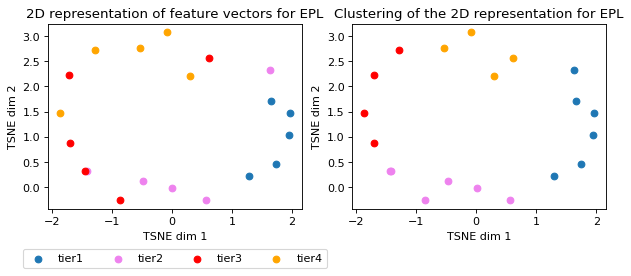

In [ ]:
plot_subgraph(A_BPL_before_threshold, 'EPL', bpl_tier1_indices, bpl_tier2_indices, bpl_tier3_indices, bpl_full_indices, 4, tier4_indices=bpl_tier4_indices)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


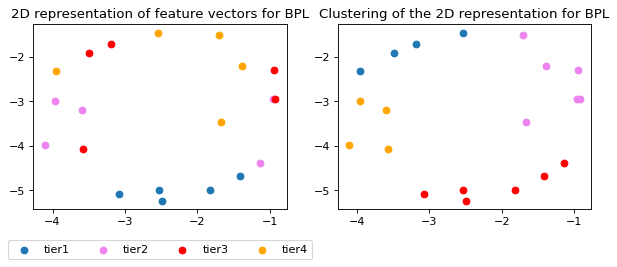

In [ ]:
plot_subgraph(H_BPL_before_threshold, 'BPL', bpl_tier1_indices, bpl_tier2_indices, bpl_tier3_indices, bpl_full_indices, 4, tier4_indices=bpl_tier4_indices)

# BL

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


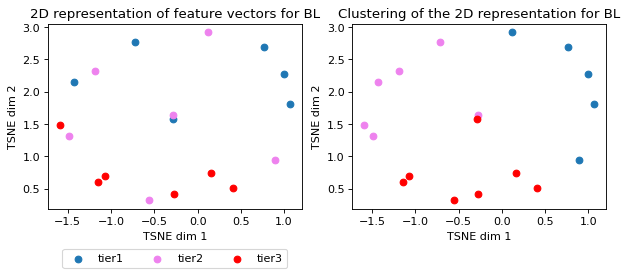

In [ ]:
plot_subgraph(A_BL_before_threshold, 'BL', bl_tier1_indices, bl_tier2_indices, bl_tier3_indices, bl_full_indices, 3)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


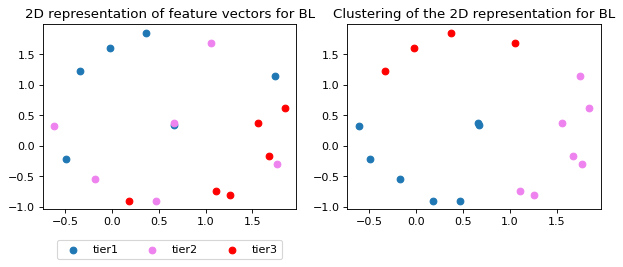

In [ ]:
plot_subgraph(H_BL_before_threshold, 'BL', bl_tier1_indices, bl_tier2_indices, bl_tier3_indices, bl_full_indices, 3)

# LLPD

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


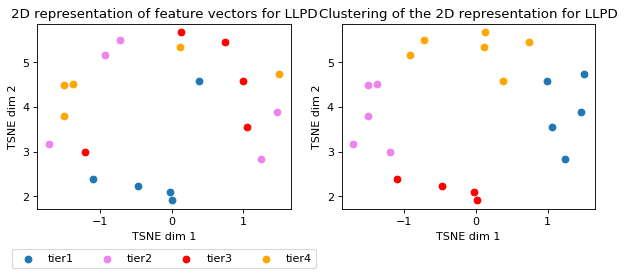

In [ ]:
plot_subgraph(A_LLPD_before_threshold, 'LLPD', llpd_tier1_indices, llpd_tier2_indices, llpd_tier3_indices, llpd_full_indices, 4, tier4_indices=llpd_tier4_indices)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


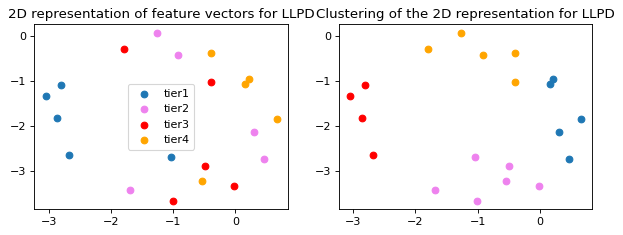

In [ ]:
plot_subgraph(H_LLPD_before_threshold, 'LLPD', llpd_tier1_indices, llpd_tier2_indices, llpd_tier3_indices, llpd_full_indices, 4, tier4_indices=llpd_tier4_indices)

# SA

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


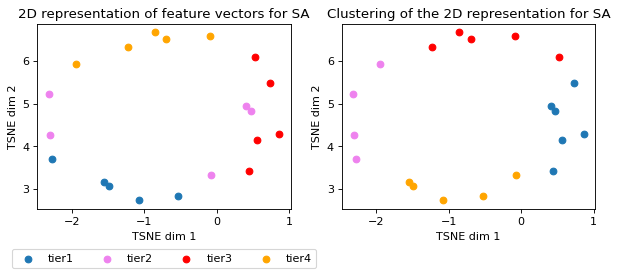

In [ ]:
plot_subgraph(A_SA_before_threshold, 'SA', sa_tier1_indices, sa_tier2_indices, sa_tier3_indices, sa_full_indices, 4, tier4_indices=sa_tier4_indices)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


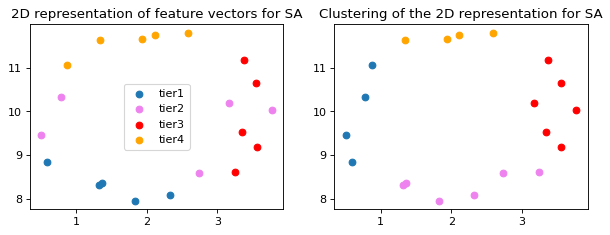

In [ ]:
plot_subgraph(H_SA_before_threshold, 'SA', sa_tier1_indices, sa_tier2_indices, sa_tier3_indices, sa_full_indices, 4, tier4_indices=sa_tier4_indices)

# BSA

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


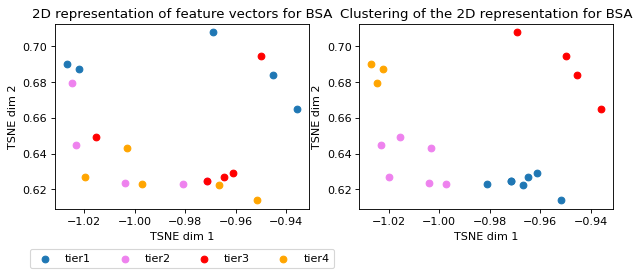

In [ ]:
plot_subgraph(A_BSA_before_threshold, 'BSA', bsa_tier1_indices, bsa_tier2_indices, bsa_tier3_indices, bsa_full_indices, 4, tier4_indices=bsa_tier4_indices)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


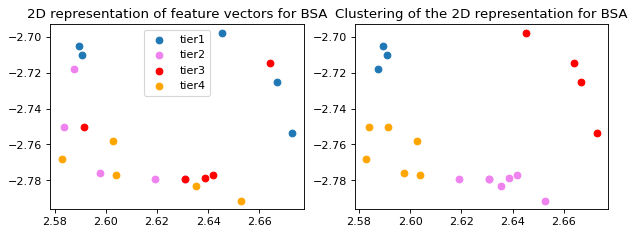

In [ ]:
plot_subgraph(H_BSA_before_threshold, 'BSA', bsa_tier1_indices, bsa_tier2_indices, bsa_tier3_indices, bsa_full_indices, 4, tier4_indices=bsa_tier4_indices)